# Part II - Prosper Loan Data Exploration
## by Ayame God'swill Claude

## Investigation Overview

In this project, I meant to investigate and provide findings for the following insights:

> INSIGHT #1: Which features affect the borrower’s APR or interest rate variable?
Put differently, which variables (predictors) have a bearing on the values of the BorrowerAPR (target) variable? 

> INSIGHT #2: What factors affect a loan’s outcome status?
In other words, which of the following variables are predictors of the LoanStatus variable?


## Dataset Overview

> This project is concerned with the exploration and visualization of the loan data from Prosper (a registered, legitimate lending company in the United States). The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income and many others. However, this project does not attempt to explore all of the variables in the dataset; we will focus our exploration on about 10-15 of them.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Loan_data_clean = pd.read_csv('Loan_data_clean.csv')

In [3]:
# To convert LoanStatus, ListingCategory_numeric and EmploymentStatus to categorical data type

Loan_data_clean.LoanStatus = Loan_data_clean.LoanStatus.astype('category')
Loan_data_clean.EmploymentStatus = Loan_data_clean.EmploymentStatus.astype('category')

## (Visualization 1)

> What affects the borrower’s APR or interest rate? Put differently, which variables (predictors) have a bearing on the values of the BorrowerAPR (target) variable?

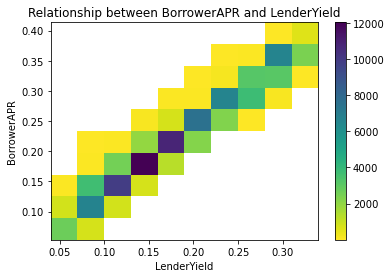

In [4]:
plt.hist2d(data = Loan_data_clean, x = 'LenderYield', y = 'BorrowerAPR', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('LenderYield')
plt.ylabel('BorrowerAPR')
plt.title('Relationship between BorrowerAPR and LenderYield');

The visualization above shows that there is a strong direct (positive) relationship/correlation between BorrowerAPR and LenderYield. So, the wanted yield of the borrower (Prosper company) for a particular loan determines the APR fixed on it

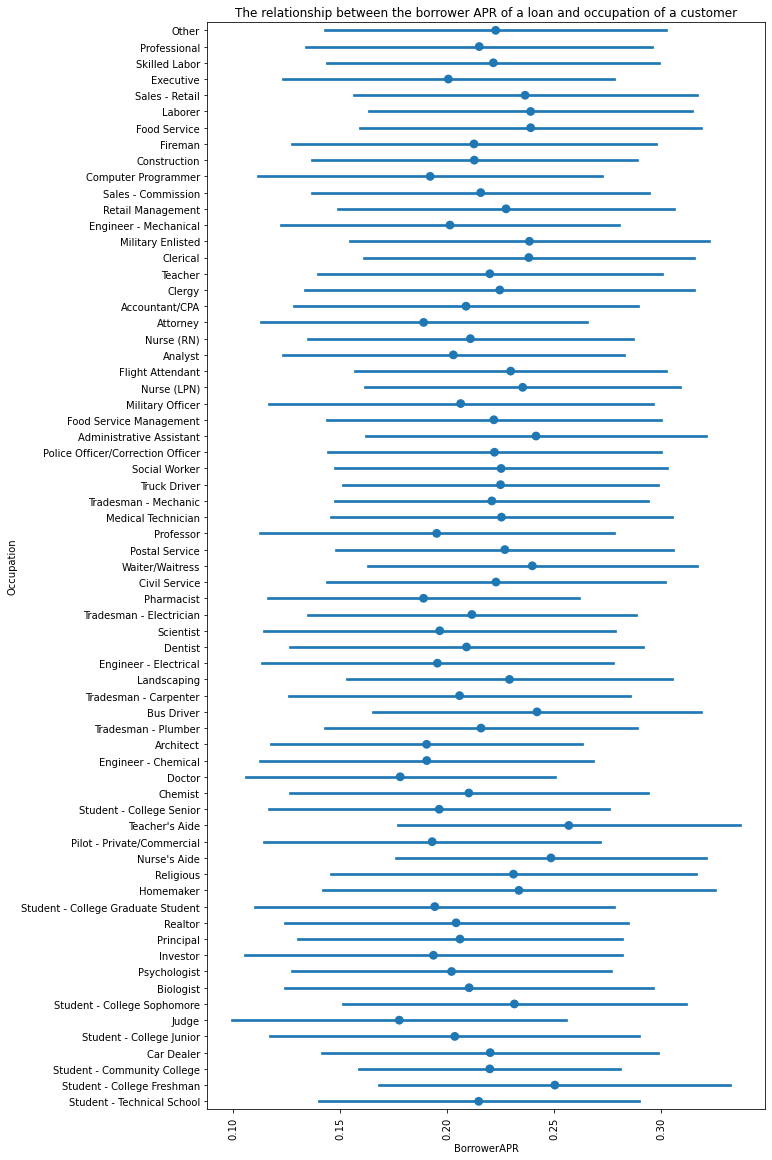

In [5]:
# BorrowerAPR (numeric) vs Occupation (categorical)....seaborn's  pointplot() function

plt.figure(figsize=[10,20])

sb.pointplot(data=Loan_data_clean, y='Occupation', x='BorrowerAPR', ci='sd', linestyles="")
plt.xticks(rotation=90)
plt.title('The relationship between the borrower APR of a loan and occupation of a customer');

It's quite obvious that Occupation is a good determining factor of the BorrowerAPR, with Teacher's Aide having the highest APR. This goes without saying that Teacher's Aide occupation loan takers would receive the lowest loan original amount, since there it has an inverse relationship with BorrowerAPR

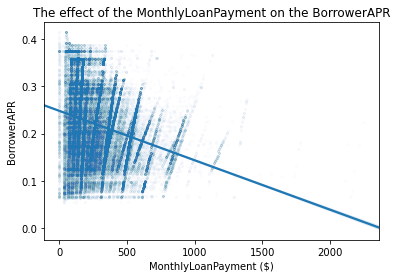

In [6]:
# BorrowerAPR (numeric-continuos) vs MonthlyLoanPayment (numeric-continuous)..seaborn's regplot
# function, employing the help of jittering and transparency to cater for overplotting

sb.regplot(data = Loan_data_clean, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/100, 's':5});

plt.xlabel('MonthlyLoanPayment ($)')
plt.title('The effect of the MonthlyLoanPayment on the BorrowerAPR');

MonthlyLoanPayment has a weak negative correlation with the BorrowerAPR on a loan, which implies it has an inverse relationship with BorrowerAPR.

## (Visualization 2)

> What factors affect a loan’s outcome status? In other words, which variables are predictors of the LoanStatus variable?

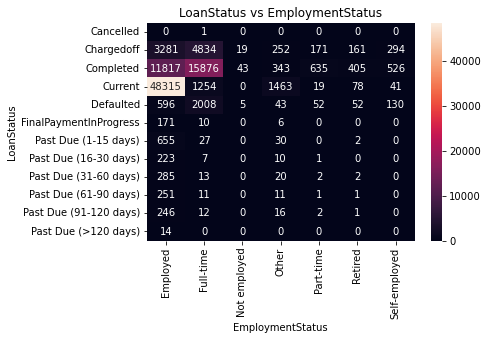

In [7]:
# LoanStatus (qualitative) vs EmploymentStatus (qualitative). I opted for a heatmap.
# Using the seaborn function heatmap() as the 2-D version of a bar chart...

# Using group_by() and size() to get the number of LoanStatus  and each combination of the two
# variable levels as a pandas Series
ct_counts = Loan_data_clean.groupby(['LoanStatus', 'EmploymentStatus']).size()

# Using Series.reset_index() to convert the series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

# Using DataFrame.pivot() to rearrange the data, to have LoanStatus on rows
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')

# Plotting the heatmap
# Adding fmt = 'd' means that annotations will all be formatted as integers.
# fmt = '.0f' can be used to cater for any cells with no counts, in order to account for NaNs.
sb.heatmap(ct_counts,  annot = True, fmt = 'd')
plt.title('LoanStatus vs EmploymentStatus');

Observing intently, one can see from the heatmap above that the employed, and especially fulltime-employed, customers usually have their loans either fully paid back or currently still running, while those not employed or retired are having their loans in the defaulted category. So the employment status does determine the loan status of a customer

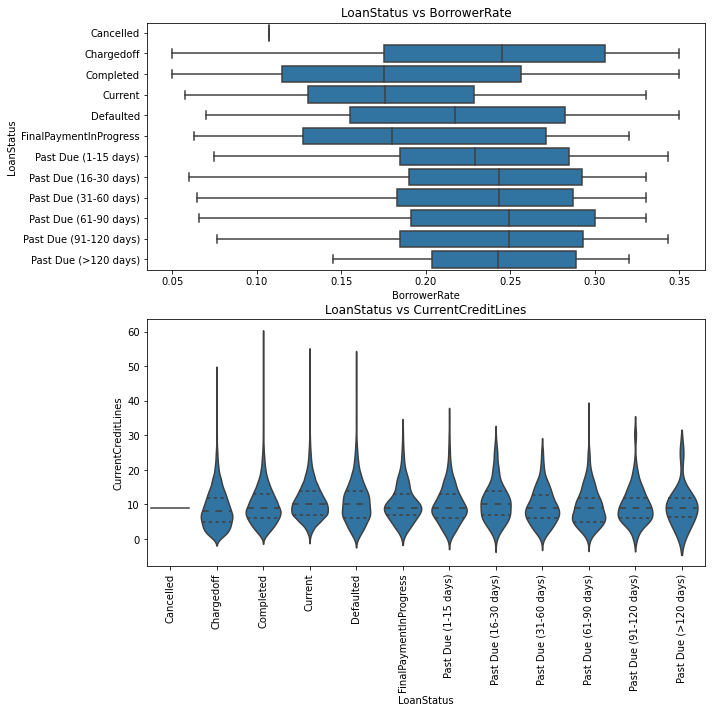

In [8]:
# LoanStatus (categorical) vs BorrowerRate (numeric-continuous) using boxplot
# LoanStatus (categorical) vs CurrentCreditLines (numeric-continuous) using violinplot
# The "inner" argument represents the datapoints in the violin interior, which can take any value
# ranging from “box”, “quartile”, “point”, “stick” or "None" 

base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 10])

# subplot 1: LoanStatus vs BorrowerRate
plt.subplot(2, 1, 1)
sb.boxplot(data=Loan_data_clean, y='LoanStatus', x='BorrowerRate', color=base_color)
plt.title('LoanStatus vs BorrowerRate')

# subplot 2: LoanStatus vs CurrentCreditLines
plt.subplot(2, 1, 2)
sb.violinplot(data=Loan_data_clean, x='LoanStatus', y='CurrentCreditLines', color=base_color, inner='quartile')
plt.xticks(rotation=90);
plt.title('LoanStatus vs CurrentCreditLines');

The visualizations above reveal that only BorrowerRate has a bearing on a loan's outcome status, while CurrentCreditLines does not appreciably affect it.

More so, it can be seen that loans with higher borrower rates end up being defaulted, paid late or chargedoff, while those with lower borrower rates are either completely paid back or in the process of being paid.

## (Visualization 3)



If a customer is both employed and is a homeowner, does this affect the amount of loan he can be given by Prosper? Would Prosper company consider him more eligible to pay back the loan completely?

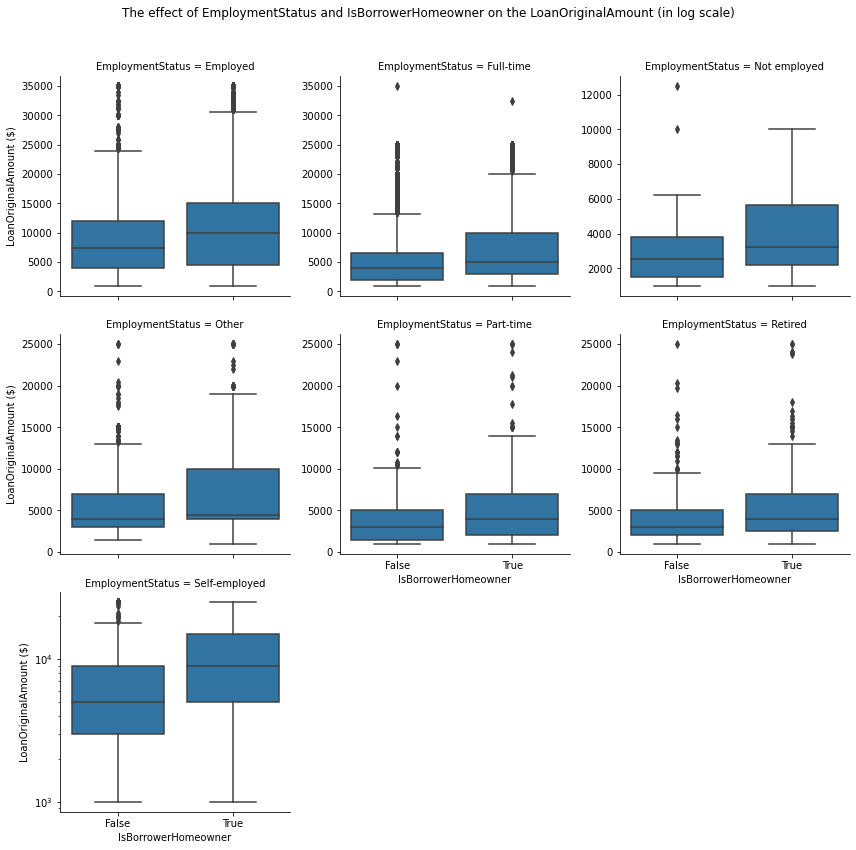

In [9]:
# Using the faceting technique (faceting on EmploymentStatus)

binsize = 6380
bin_edges = np.arange(1000, 35000+binsize, binsize)   #for the LoanOriginalAmount numeric variable

g = sb.FacetGrid(data = Loan_data_clean, col = 'EmploymentStatus', col_wrap=3, sharey=False, height = 4)
g.map(sb.boxplot, 'IsBorrowerHomeowner', 'LoanOriginalAmount')
plt.yscale('log')
g.set_xlabels('IsBorrowerHomeowner')
g.set_ylabels('LoanOriginalAmount ($)')

# To add overall title to the plot
g.fig.suptitle('The effect of EmploymentStatus and IsBorrowerHomeowner on the LoanOriginalAmount (in log scale)')

# To move the overall title slightly higher up so it does not overlap with the labels of the plot
g.fig.subplots_adjust(top=.9);

As seen above, in all cases if a borrower is a homeowner the loan original amount obtainable is higher, whether the borrower is employed or not, although in cases where employed the amount obtainable is higher than when not employed. This may be due to the fact that the property could be used as collateral by the borrower, making them appear less of a risk to transact with by Prosper company

In [10]:
!jupyter nbconvert CLAUDE_Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook CLAUDE_Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 971470 bytes to CLAUDE_Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\user\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(